In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from scipy.io import loadmat


In [8]:
DATA_PATH_1 = "hands_on_datasets/ex6data1.mat"
DATA_PATH_2 = "hands_on_datasets/ex6data2.mat"
DATA_PATH_3 ="hands_on_datasets/ex6data3.mat"
DATA_SPAM_TRAIN = "hands_on_datasets/spamTrain.mat"
DATA_SPAM_TEST = "hands_on_datasets/spamTest.mat"


In [4]:
def plot_data(X,y,xlabel,ylabel,pos_label,neg_label,xmin,xmax,ymin,ymax,axes = None):
    plt.rcParams["figure.figsize"] = (20., 14.)
    pos = y[:,0] == 1
    neg = y[:,0] == 0 

    if axes == None :
        axes = plt.gca()
    axes.scatter(X[pos][:,0],X[pos][:,1],marker = "o",c ="#003f5c",s = 50,linewidth = 2 ,label = pos_label)
    axes.scatter(X[neg][:,0],X[neg][:,1],marker = "o",c ="#ffa600",s = 50,linewidth = 2 ,label = neg_label)

    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])

    axes.set_xlabel(xlabel,fontsize = 12)
    axes.set_ylabel(ylabel,fontsize = 12)

    axes.legend(bbox_to_anchor=(1,1),fancybox = True)
    





## SVM with small regularization

In [9]:
data1 = loadmat(DATA_PATH_1)

In [14]:
X =data1["X"]
y = data1["y"]

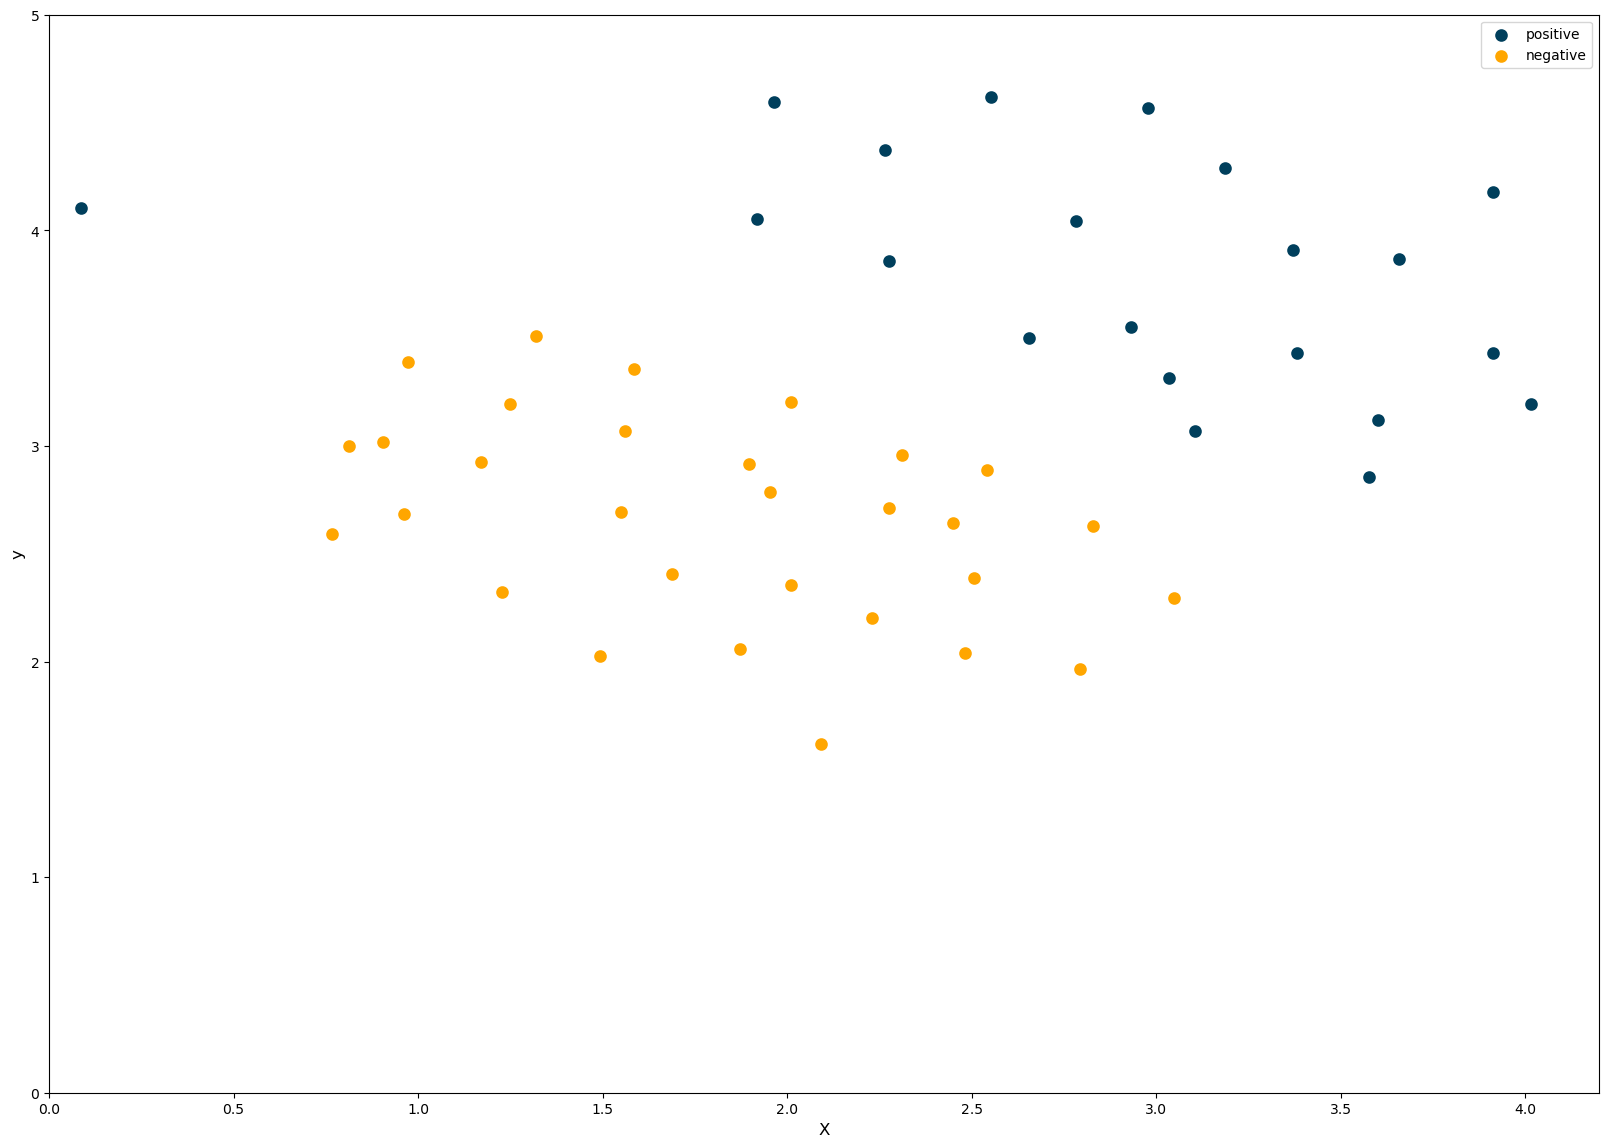

In [15]:
plot_data(X,y ,"X","y","positive","negative",0,4.2,0,5)

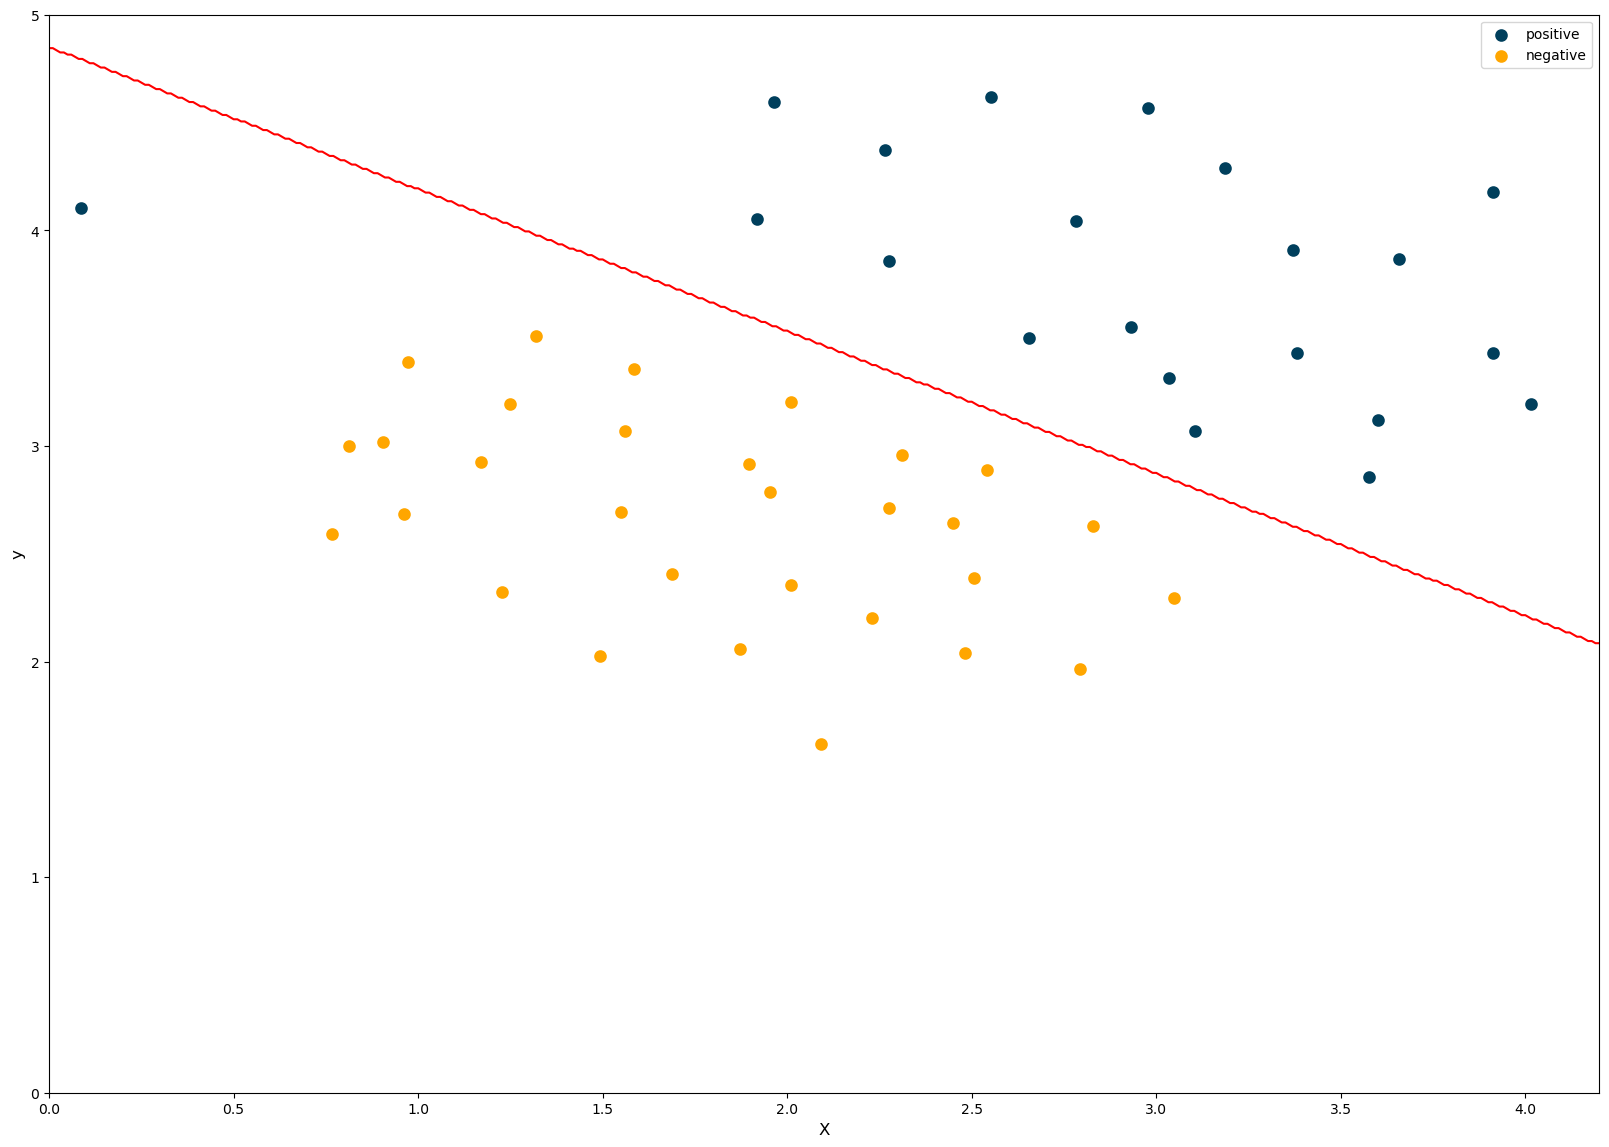

In [26]:
clf = svm.SVC(kernel="linear",C = 1.0, decision_function_shape="ovr")
clf.fit(X,y.ravel())
plot_data(X,y ,"X","y","positive","negative",0,4.2,0,5)
x_1,x_2 =np.meshgrid(np.arange(0.0,5.0,0.01),np.arange(0.0,5.0,0.01))
Z =clf.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z =Z.reshape(x_1.shape)
plt.contour(x_1,x_2,Z,[0.5],colors = "r")

## SVM With NON-Linear Boundary

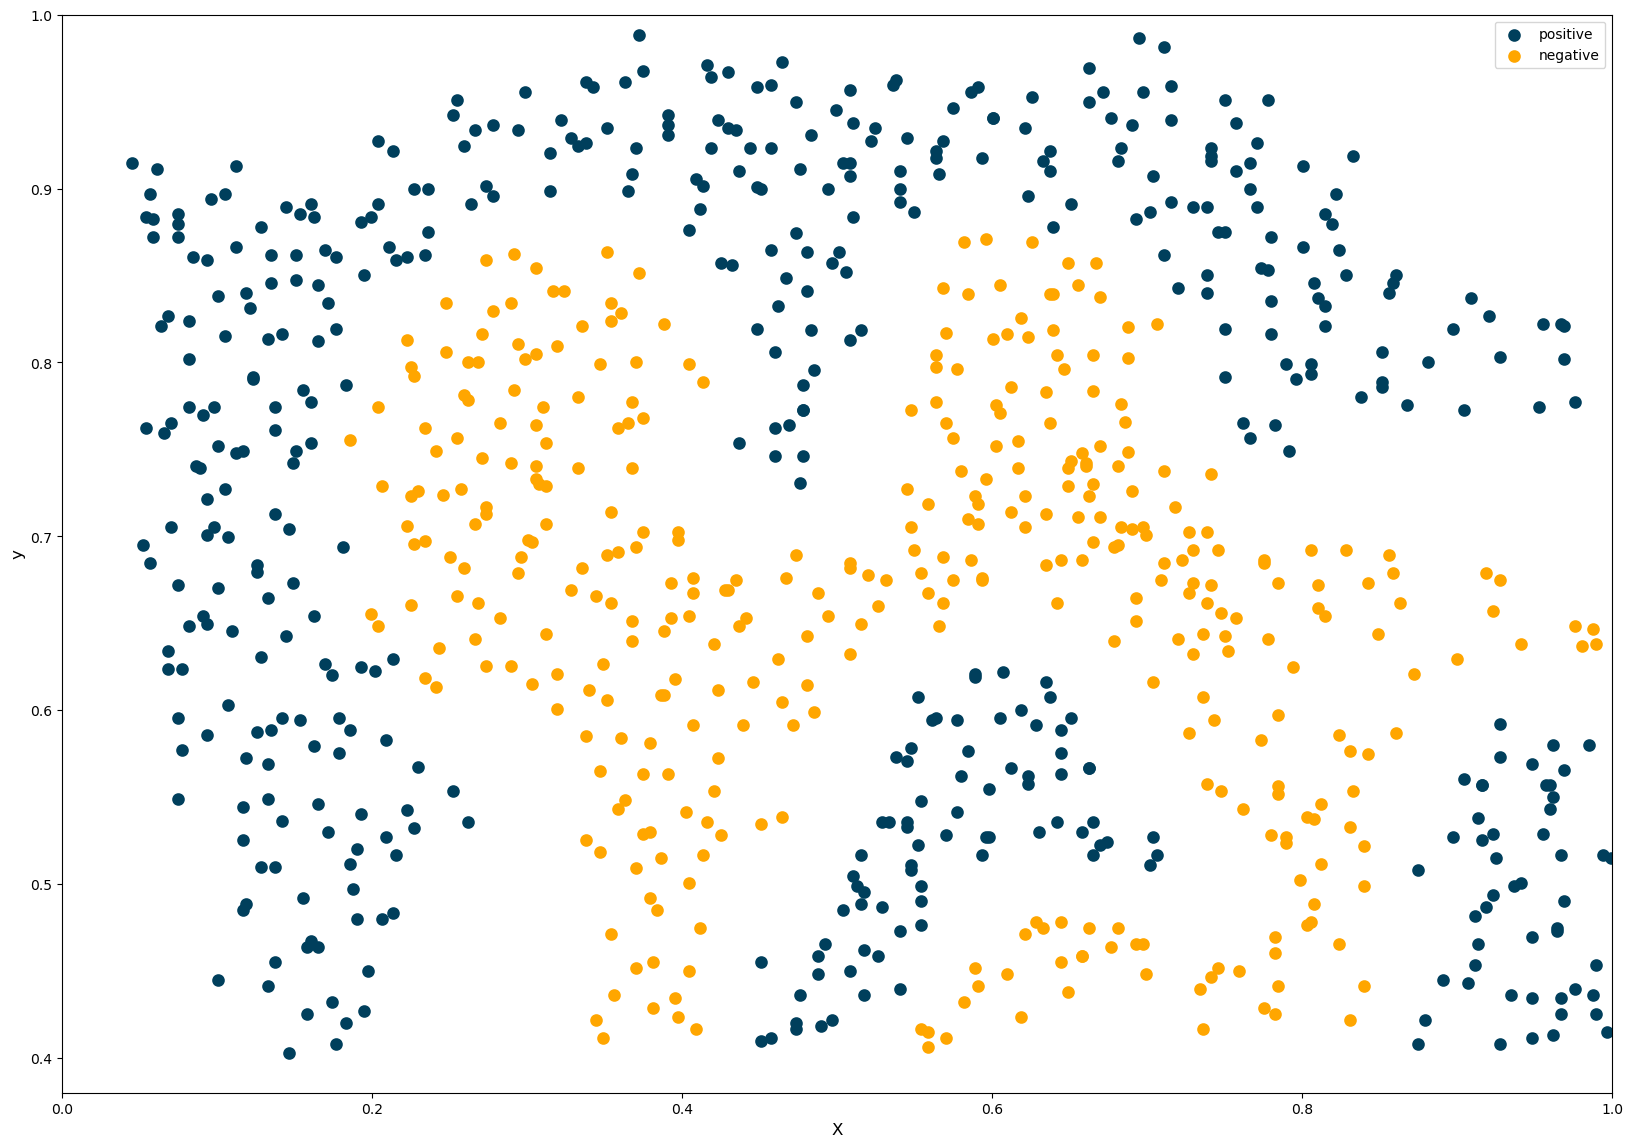

In [28]:
data2 = loadmat(DATA_PATH_2)
X = data2["X"]
y = data2["y"]

plot_data(X,y ,"X","y","positive","negative",0,1.,0.38,1)


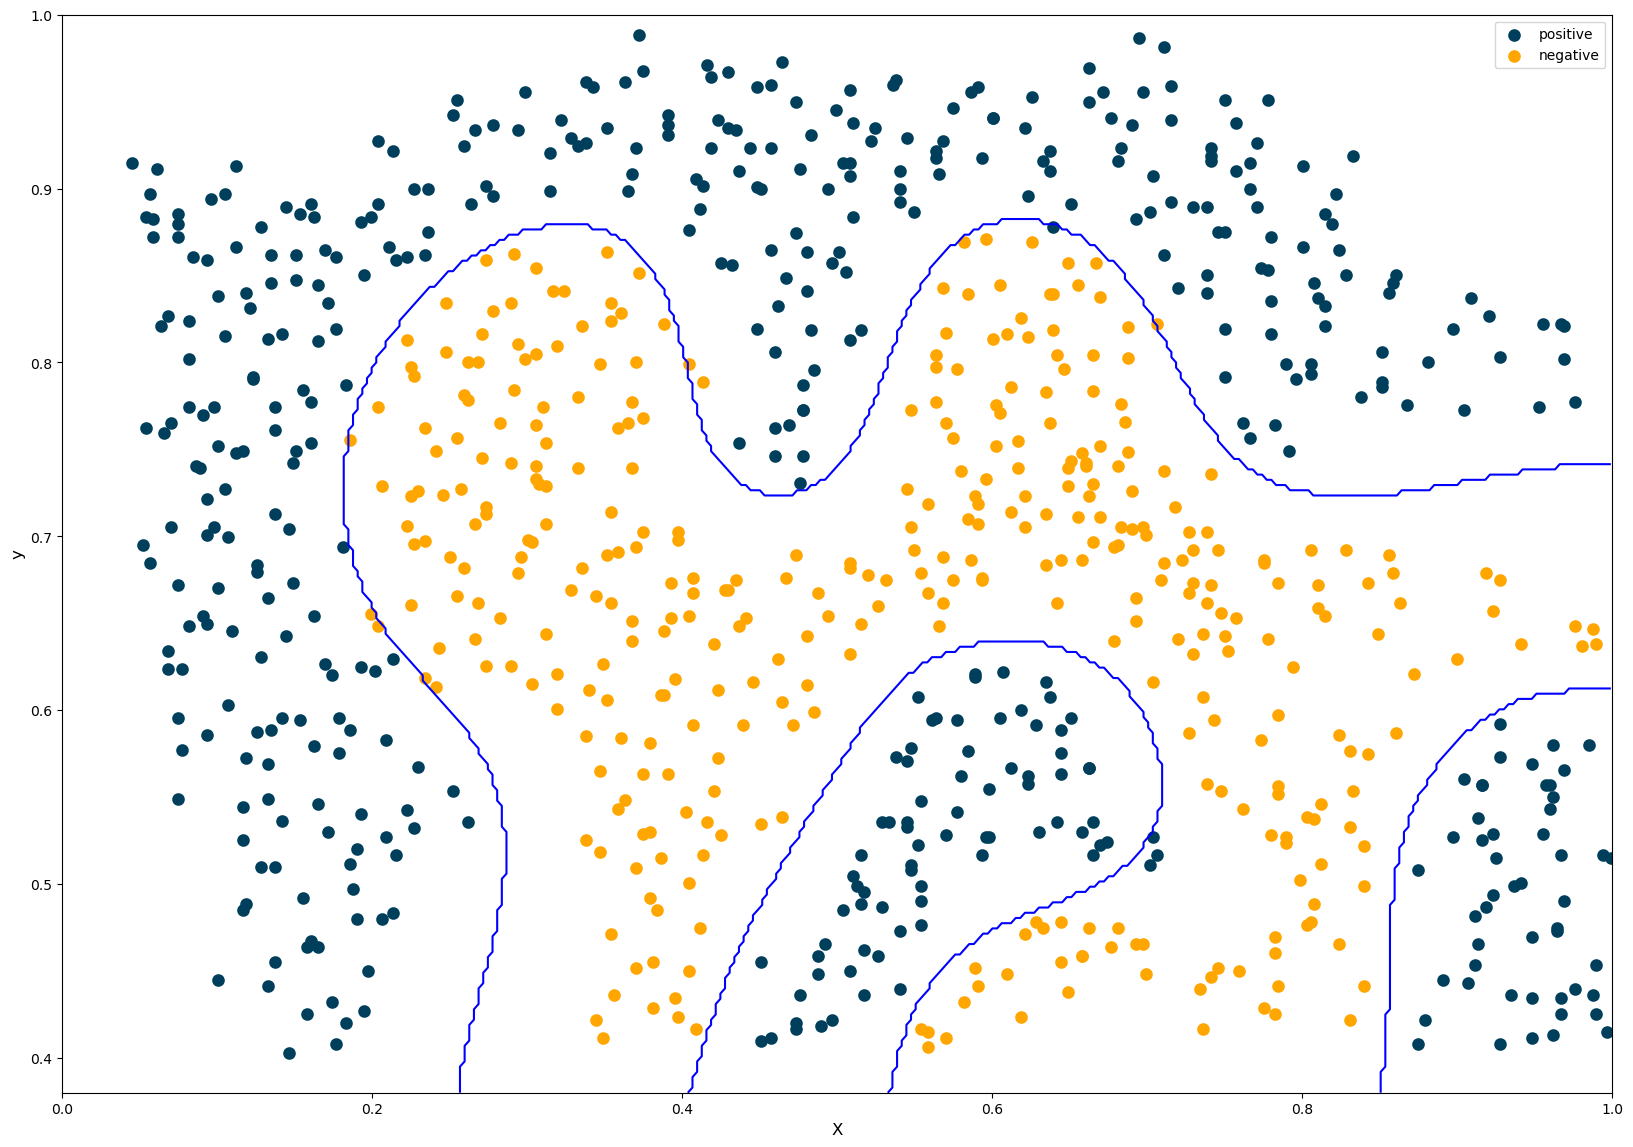

In [32]:
sigma = 0.1
gamma = 1/(2*sigma**2)

clfg = svm.SVC(kernel="rbf",C = 1.,gamma=gamma,decision_function_shape="ovr")
clfg.fit(X,y.ravel())

x_1,x_2 =np.meshgrid(np.arange(0.0,1.0,0.003),np.arange(0.38,1.,0.003))
Z =clfg.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z =Z.reshape(x_1.shape)
plot_data(X,y ,"X","y","positive","negative",0,1.,0.38,1)
plt.contour(x_1,x_2,Z,[0.5],colors = "b")


## SVM with Cross Validation

In [36]:

data3 = loadmat(DATA_PATH_3)
X = data3["X"]
y = data3["y"]


sigma = [0.01,0.03,0.1,0.3,1,3,10,30]
C = [0.01,0.03,0.1,0.3,1,3,10,30]
scores = []
s_c = []
for s in sigma :
    for c_ in C :
        gamma = 1/(2 * s**2)
        clf_cross = svm.SVC(kernel="rbf" , gamma = gamma,C =c_,decision_function_shape="ovr")
        clf_cross.fit(X,y.ravel())
        X_val = data3["Xval"]
        y_val = data3["yval"]
        scores.append(clf_cross.score(X_val,y_val.ravel()))
        s_c.append((s,c_))



In [37]:
index = np.argmax(scores)
opt_s,opt_c = s_c[index]
print(f"Optimum parameter values: C-->{opt_c} | s-->{opt_s}")

Optimum parameter values: C-->1 | s-->0.1


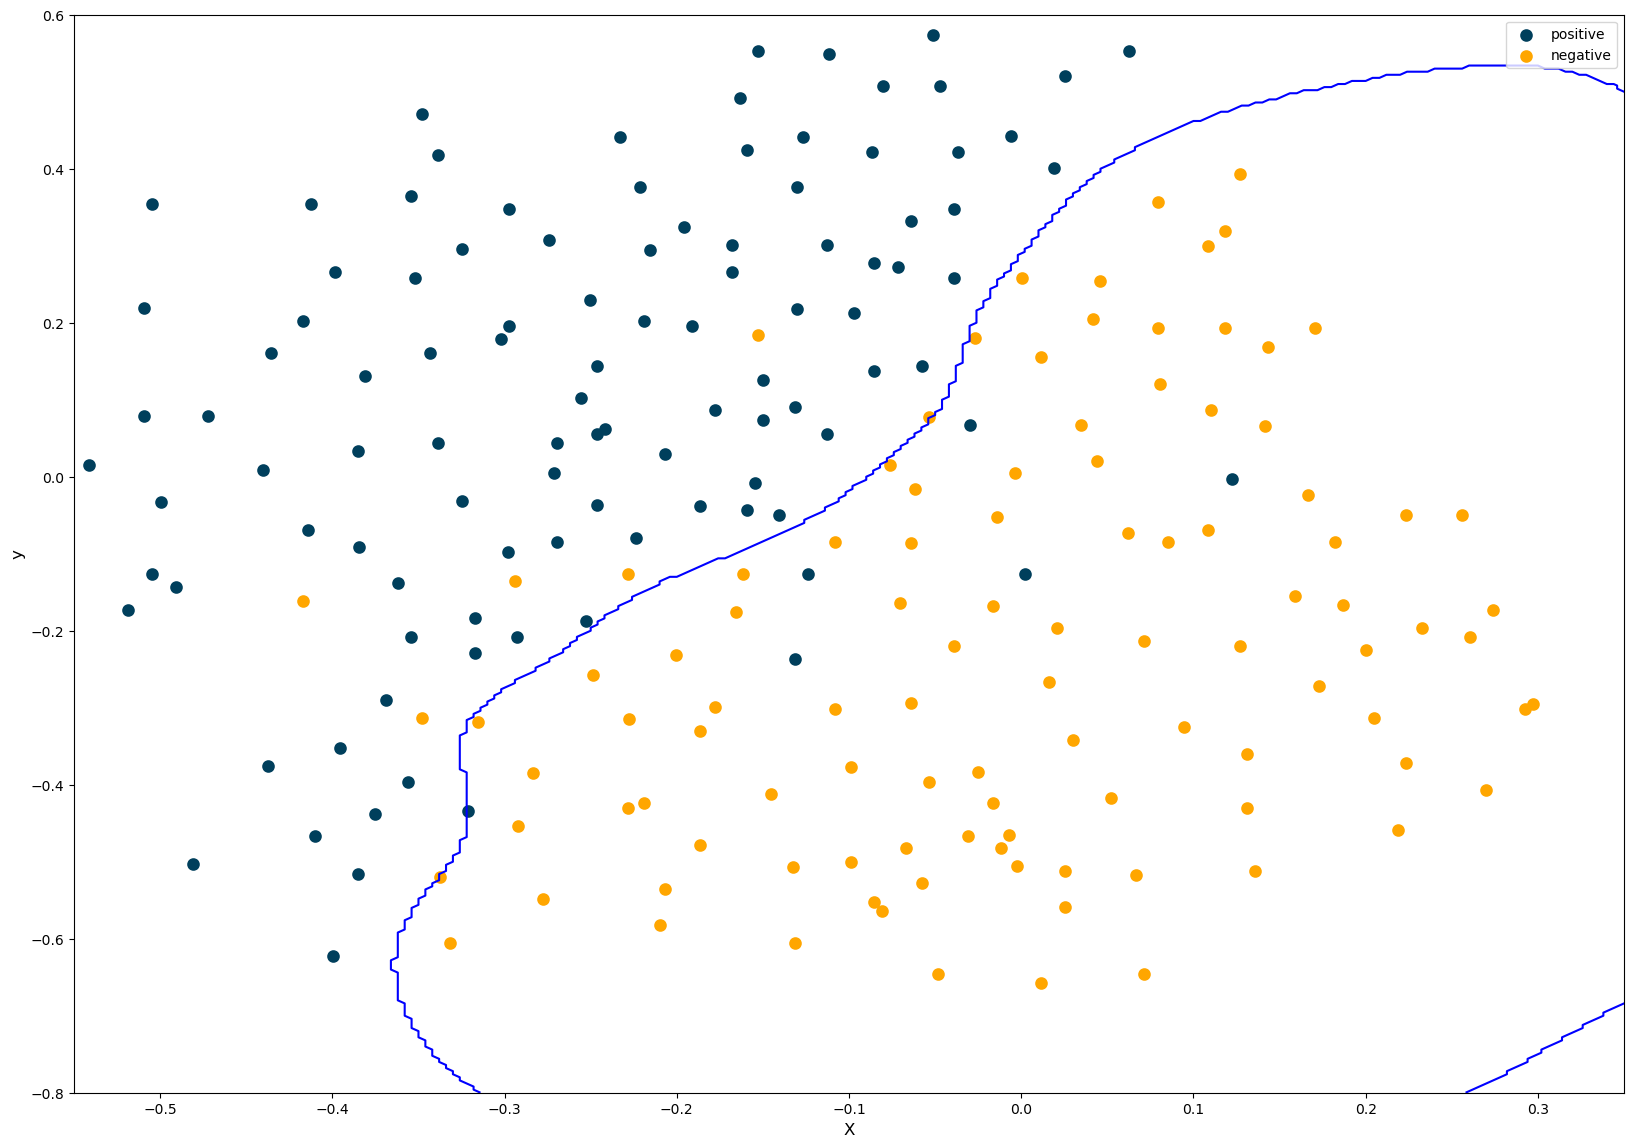

In [40]:
opt_gamma = 1/(2* opt_s ** 2)
opt_clfg = svm.SVC(kernel="rbf",gamma=opt_gamma,C = opt_c,decision_function_shape="ovr")
opt_clfg.fit(X,y.ravel())

x_1,x_2 =np.meshgrid(np.arange(-0.6,0.4,0.004),np.arange(-0.8,0.6,0.004))
Z =opt_clfg.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z =Z.reshape(x_1.shape)
plot_data(X,y ,"X","y","positive","negative",-0.55,0.35,-0.8,0.6)
plt.contour(x_1,x_2,Z,[0.5],colors = "b")

## Spam Detection

In [46]:
spam_train_data = loadmat(DATA_SPAM_TRAIN)
spam_test_data = loadmat(DATA_SPAM_TEST)

X_train = spam_train_data["X"]
y_train = spam_train_data["y"]
X_test = spam_test_data["Xtest"]
y_test = spam_test_data["ytest"]


In [48]:
spam_clf = svm.SVC(kernel="linear",C=0.1,decision_function_shape="ovr")
spam_clf.fit(X_train,y_train.ravel())
train_acc = spam_clf.score(X_train,y_train.ravel())
test_acc = spam_clf.score(X_test,y_test.ravel())

In [50]:
print(f"Train Acc:{train_acc * 100} | Test Acc:{test_acc *100 }")

Train Acc:99.825 | Test Acc:98.9
